Dicas de pandas: 
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

- https://www.kaggle.com/code/randylaosat/pandas-reference-guide-teach-me-how-to-pandas

# 1

Importe a biblioteca pandas e leia o arquivo population_by_count.csv como um dataframe

In [10]:
import pandas as pd

path = "population_by_county.csv"
df = pd.read_csv(path)

print(df)

                County           State  2010Census  2017PopEstimate
0     Abbeville County  South Carolina       25417            24722
1        Acadia Parish       Louisiana       61773            62590
2      Accomack County        Virginia       33164            32545
3           Ada County           Idaho      392365           456849
4         Adair County            Iowa        7682             7054
...                ...             ...         ...              ...
3137       Yuma County         Arizona      195751           207534
3138       Yuma County        Colorado       10043            10075
3139     Zapata County           Texas       14018            14322
3140     Zavala County           Texas       11677            11948
3141    Ziebach County    South Dakota        2801             2756

[3142 rows x 4 columns]


# 2

Mostre as 3 primeiras linhas do dataframe

In [11]:
df.head(3)

,County,State,2010Census,2017PopEstimate
0,Abbeville County,South Carolina,25417,24722
1,Acadia Parish,Louisiana,61773,62590
2,Accomack County,Virginia,33164,32545


# 3

Quais são os nomes das colunas?

In [12]:
df.columns

Index(['County', 'State', '2010Census', '2017PopEstimate'], dtype='object')

# 4

Há quantos estados neste conjunto de dados? E quais são os estados?


In [13]:
num_estados = df['State'].value_counts().shape[0]
print('Existem', num_estados, 'neste conjunto de dados. \n')

df['State'].value_counts()

Existem 51 neste conjunto de dados. 



State
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Alabama                  67
Florida                  67
Pennsylvania             67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Utah          

# 5

Quais são os cinco 'County' mais comuns?

In [14]:
maisComuns = df['County'].value_counts()
maisComuns[0:5]

County
Washington County    30
Jefferson County     25
Franklin County      24
Lincoln County       23
Jackson County       23
Name: count, dtype: int64

# 6

Quantos 'County' possuiam população maior que 1 milhão em 2010?

In [15]:
df.head()

,County,State,2010Census,2017PopEstimate
0,Abbeville County,South Carolina,25417,24722
1,Acadia Parish,Louisiana,61773,62590
2,Accomack County,Virginia,33164,32545
3,Ada County,Idaho,392365,456849
4,Adair County,Iowa,7682,7054


In [20]:
maiorQue1milhao = df.loc[df['2010Census'] > 1000000]
numero_estados = maiorQue1milhao.shape[0]
print(f"O número de estados com mais de 1 milhão de habitantes é {numero_estados}")

O número de estados com mais de 1 milhão de habitantes é 39


# 7

Adicione uma coluna com o resultado da relação da diferença entre o censo de 2010 e a população estimada em 2017?

(2017-2010)/2010


In [21]:
df

,County,State,2010Census,2017PopEstimate
0,Abbeville County,South Carolina,25417,24722
1,Acadia Parish,Louisiana,61773,62590
2,Accomack County,Virginia,33164,32545
3,Ada County,Idaho,392365,456849
4,Adair County,Iowa,7682,7054
...,...,...,...,...
3137,Yuma County,Arizona,195751,207534
3138,Yuma County,Colorado,10043,10075
3139,Zapata County,Texas,14018,14322
3140,Zavala County,Texas,11677,11948


In [22]:
df = df.assign(growth_rate_porc = lambda df: (100*(df['2017PopEstimate']-df['2010Census'])/df['2010Census']))
df.rename(columns= {'Growth Rate (%) ': 'growth_rate_porc'})

,County,State,2010Census,2017PopEstimate,growth_rate_porc
0,Abbeville County,South Carolina,25417,24722,-2.734390
1,Acadia Parish,Louisiana,61773,62590,1.322584
2,Accomack County,Virginia,33164,32545,-1.866482
3,Ada County,Idaho,392365,456849,16.434697
4,Adair County,Iowa,7682,7054,-8.174954
...,...,...,...,...,...
3137,Yuma County,Arizona,195751,207534,6.019382
3138,Yuma County,Colorado,10043,10075,0.318630
3139,Zapata County,Texas,14018,14322,2.168640
3140,Zavala County,Texas,11677,11948,2.320802


# 8

Realizar plots das informações que pareçam úteis.

<Axes: xlabel='2017PopEstimate', ylabel='growth_rate_porc'>

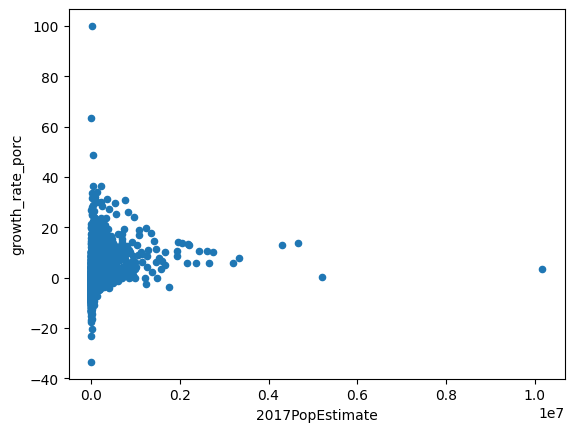

In [23]:
df.plot.scatter(x = '2017PopEstimate', y = 'growth_rate_porc')

<Axes: xlabel='growth_rate_porc', ylabel='2010Census'>

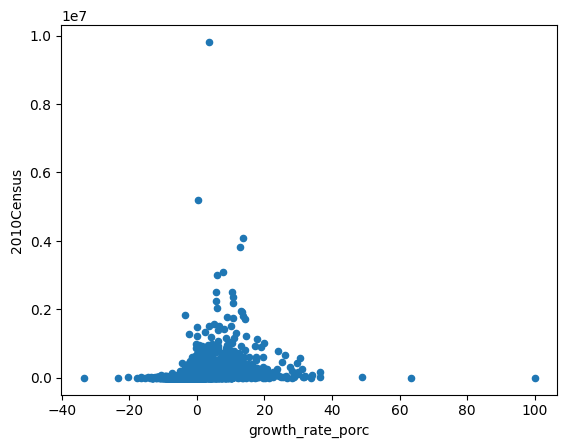

In [26]:
df.plot.scatter(x = 'growth_rate_porc', y = '2010Census')